# 2.4 Evaluating Hyperparameters Random Forest
## This sctipt contains the following points:
### 01. Importing Libraries and Data
### 02. Data Preparation
### 03. Evaluating Hyperparameters

### 01. Importing Libraries and Data

In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [5]:
# Creating path variable
path = r'/home/cwidner/Documents/CareerFoundry/MachineLearning'

In [7]:
# Loading in cleaned weather dataset
df_weather = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','weather_cleaned.csv'),index_col=False)
df_weather.shape

(22950, 136)

In [9]:
df_weather.drop(columns=['Unnamed: 0'],inplace=True)
df_weather.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  STOCKHOLM_temp_max  \
0            10.9                     1  ...                 4.9   
1            10.1                     6  ...                 5.0   
2             9.9                     6  ...                 4.1   
3            10.6                     8  ...                 2.3   
4             6.0                     8  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 135 columns]

In [11]:
# Loading in cleaned pleasant dataset
df_pleasant = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','pleasant_weather_cleaned.csv'),index_col=False)
df_pleasant.shape

(22950, 16)

In [13]:
df_pleasant.drop(columns=['Unnamed: 0'],inplace=True)
df_pleasant.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [16]:
# Loading weather data with dates
df_w = pd.read_csv(os.path.join(path,'02 Data','Original Data','Dataset-weather-prediction-dataset-processed.csv'),index_col=False)
df_w.shape

(22950, 170)

In [18]:
df_w.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

### 02. Data Preparation

In [21]:
# Concatenating DATE column of the original weather data to the cleaned weather data
df_weather = pd.concat([df_w['DATE'],df_weather],axis=1)
df_weather

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101                  7            0.85          1.0180   
1      19600102                  6            0.84          1.0180   
2      19600103                  8            0.90          1.0180   
3      19600104                  3            0.92          1.0180   
4      19600105                  6            0.95          1.0180   
...         ...                ...             ...             ...   
22945  20221027                  1            0.79          1.0248   
22946  20221028                  6            0.77          1.0244   
22947  20221029                  4            0.76          1.0227   
22948  20221030                  5            0.80          1.0212   
22949  20221031                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.

In [23]:
# Reducing data to just the 1990s
df_decade = df_weather[df_weather['DATE'].astype(str).str[:3]=='199']
df_decade

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958  19900101                  0            0.83          1.0217   
10959  19900102                  2            0.84          1.0238   
10960  19900103                  8            0.89          1.0231   
10961  19900104                  2            0.77          1.0265   
10962  19900105                  7            0.81          1.0286   
...         ...                ...             ...             ...   
14605  19991227                  7            0.74          0.9953   
14606  19991228                  8            0.88          0.9956   
14607  19991229                  8            0.84          1.0162   
14608  19991230                  7            0.80          1.0276   
14609  19991231                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
10958             -2.1            -3.6             1.2  ...   
10959             -1.8            -3.9             1.7  ...   
10960             -2.2            -4.2             0.4  ...   
10961             -0.7            -3.1             2.2  ...   
10962              0.0            -3.1             2.6  ...   
...                ...             ...             ...  ...   
14605              5.0             1.5             6.5  ...   
14606              2.4             1.0             3.4  ...   
14607              1.8             1.0             2.7  ...   
14608              1.1            -0.3             3.4  ...   
14609              0.7            -0.7             1.9  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958                -0.3                     3               0.82   
10959                -3.4                     5               0.79   
10960                -2.6                     4               0.90   
10961                 0.5                     6               0.93   
10962                 0.8                     4               0.91   
...                   ...                   ...                ...   
14605                 1.6                     7               0.75   
14606                 1.0                     3               0.73   
14607                -1.1                     5               0.81   
14608                -2.5                     8               0.94   
14609                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954                       0.15                    0.41   
14606             1.0102                       0.41                    0.03   
14607             1.

In [25]:
# Dropping DATE column
df_decade = df_decade.drop(columns=['DATE'],axis=1)
df_decade

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

In [27]:
# Concatenating DATE column of original weather data to cleaned pleasant dataset
df_pleasant = pd.concat([df_w['DATE'],df_pleasant],axis=1)
df_pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [29]:
# Reducing pleasant dataset to just 1990s
df_pleasant_decade = df_pleasant[df_pleasant['DATE'].astype(str).str[:3]=='199']
df_pleasant_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   
...         ...                     ...                        ...   
14605  19991227                       0                          0   
14606  19991228                       0                          0   
14607  19991229                       0                          0   
14608  19991230                       0                          0   
14609  19991231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0    

In [31]:
# Dropping DATE column
df_pleasant_decade = df_pleasant_decade.drop(columns=['DATE'],axis=1)
df_pleasant_decade

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958                       0                          0   
10959                       0                          0   
10960                       0                          0   
10961                       0                          0   
10962                       0                          0   
...                       ...                        ...   
14605                       0                          0   
14606                       0                          0   
14607                       0                          0   
14608                       0                          0   
14609                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   
...                          ...                      ...   
14605                          0                        0   
14606                          0                        0   
14607                          0                        0   
14608                          0                        0   
14609                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   
...                            ...                        ...   
14605                            0                          0   
14606                            0                          0   
14607                            0                          0   
14608                            0                          0   
14609                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   
...                        ...                         ...   
14605                        0                           0   
14606                        0                           0   
14607                        0                           0   
14608                        0                           0   
14609                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   
...                            ...                      ...   
14605                            0                        0   
14606                            0                        0   
14607                            0                        0   
14608                            0                        0   
14609                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0  

### 03. Evaluating Hyperparameters
#### All Stations in the 1990s

In [35]:
# Creating random seed
tf.random.set_seed(42)

In [37]:
# Creating matrix
X = df_decade
y = df_pleasant_decade

print(X.shape)
print(y.shape)

(3652, 135)
(3652, 15)


In [43]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [47]:
# creating a RF classifier
clf = RandomForestClassifier()

#### Grid Search

In [67]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
            'n_estimators':[10,100,200],
            'max_features':[1,3,5,7],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[1,2,3],
            'criterion':['gini','entropy']
           }

In [69]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.535 total time=   2.4s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.487 total time=   0.2s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.537 total time=   2.2s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.449 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.452 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.459 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.466 total time= 

/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
864 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/cwidner/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

Search took 3.198045818010966 minutes


In [74]:
# Printing grid seach results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best GRID search score is: 0.539201141287029


#### Random Search

In [70]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
          'n_estimators':np.arange(10, 500, step=50),
          'max_features':randint(1,7),
          'min_samples_leaf':randint(1,4),
          'min_samples_split':np.arange(2, 10, step=2),
          'criterion':['gini','entropy']
         }

In [59]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [73]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.1745340824127197 minutes


In [75]:
# Printing random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 0.527561406433668


In [81]:
clf3 = RandomForestClassifier(
    n_estimators = 100, 
    max_depth=None, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=3, 
    criterion = 'gini'
)

clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=7, min_samples_split=3)

In [85]:
# Performing predictions on test dataset
y_pred = clf3.predict(X_test)

# Calculating accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test,y_pred)) 

Model Accuracy:  0.5677154582763337


[Text(0.38961003241456293, 0.9772727272727273, 'x[24] <= 14.25\ngini = 0.314\nsamples = 1833\nvalue = [[2238.0, 683.0]\n[1959.0, 962.0]\n[1964.0, 957.0]\n[2343.0, 578.0]\n[2302.0, 619.0]\n[2294.0, 627.0]\n[2372.0, 549.0]\n[2120.0, 801.0]\n[2328.0, 593.0]\n[1594.0, 1327.0]\n[2359.0, 562.0]\n[2473.0, 448.0]\n[2921.0, 0.0]\n[2458.0, 463.0]\n[2729.0, 192.0]]'),
 Text(0.18239631633178774, 0.9318181818181818, 'x[61] <= 4.35\ngini = 0.098\nsamples = 1073\nvalue = [[1598.0, 121.0]\n[1548.0, 171.0]\n[1635.0, 84.0]\n[1646.0, 73.0]\n[1634.0, 85.0]\n[1638.0, 81.0]\n[1673.0, 46.0]\n[1571.0, 148.0]\n[1638.0, 81.0]\n[1303.0, 416.0]\n[1666.0, 53.0]\n[1694.0, 25.0]\n[1719.0, 0.0]\n[1709.0, 10.0]\n[1681.0, 38.0]]'),
 Text(0.10356828524815387, 0.8863636363636364, 'x[5] <= 9.55\ngini = 0.048\nsamples = 795\nvalue = [[1220.0, 37.0]\n[1185.0, 72.0]\n[1232.0, 25.0]\n[1240.0, 17.0]\n[1226.0, 31.0]\n[1229.0, 28.0]\n[1246.0, 11.0]\n[1227.0, 30.0]\n[1230.0, 27.0]\n[1073.0, 184.0]\n[1246.0, 11.0]\n[1255.0, 2.0]\n

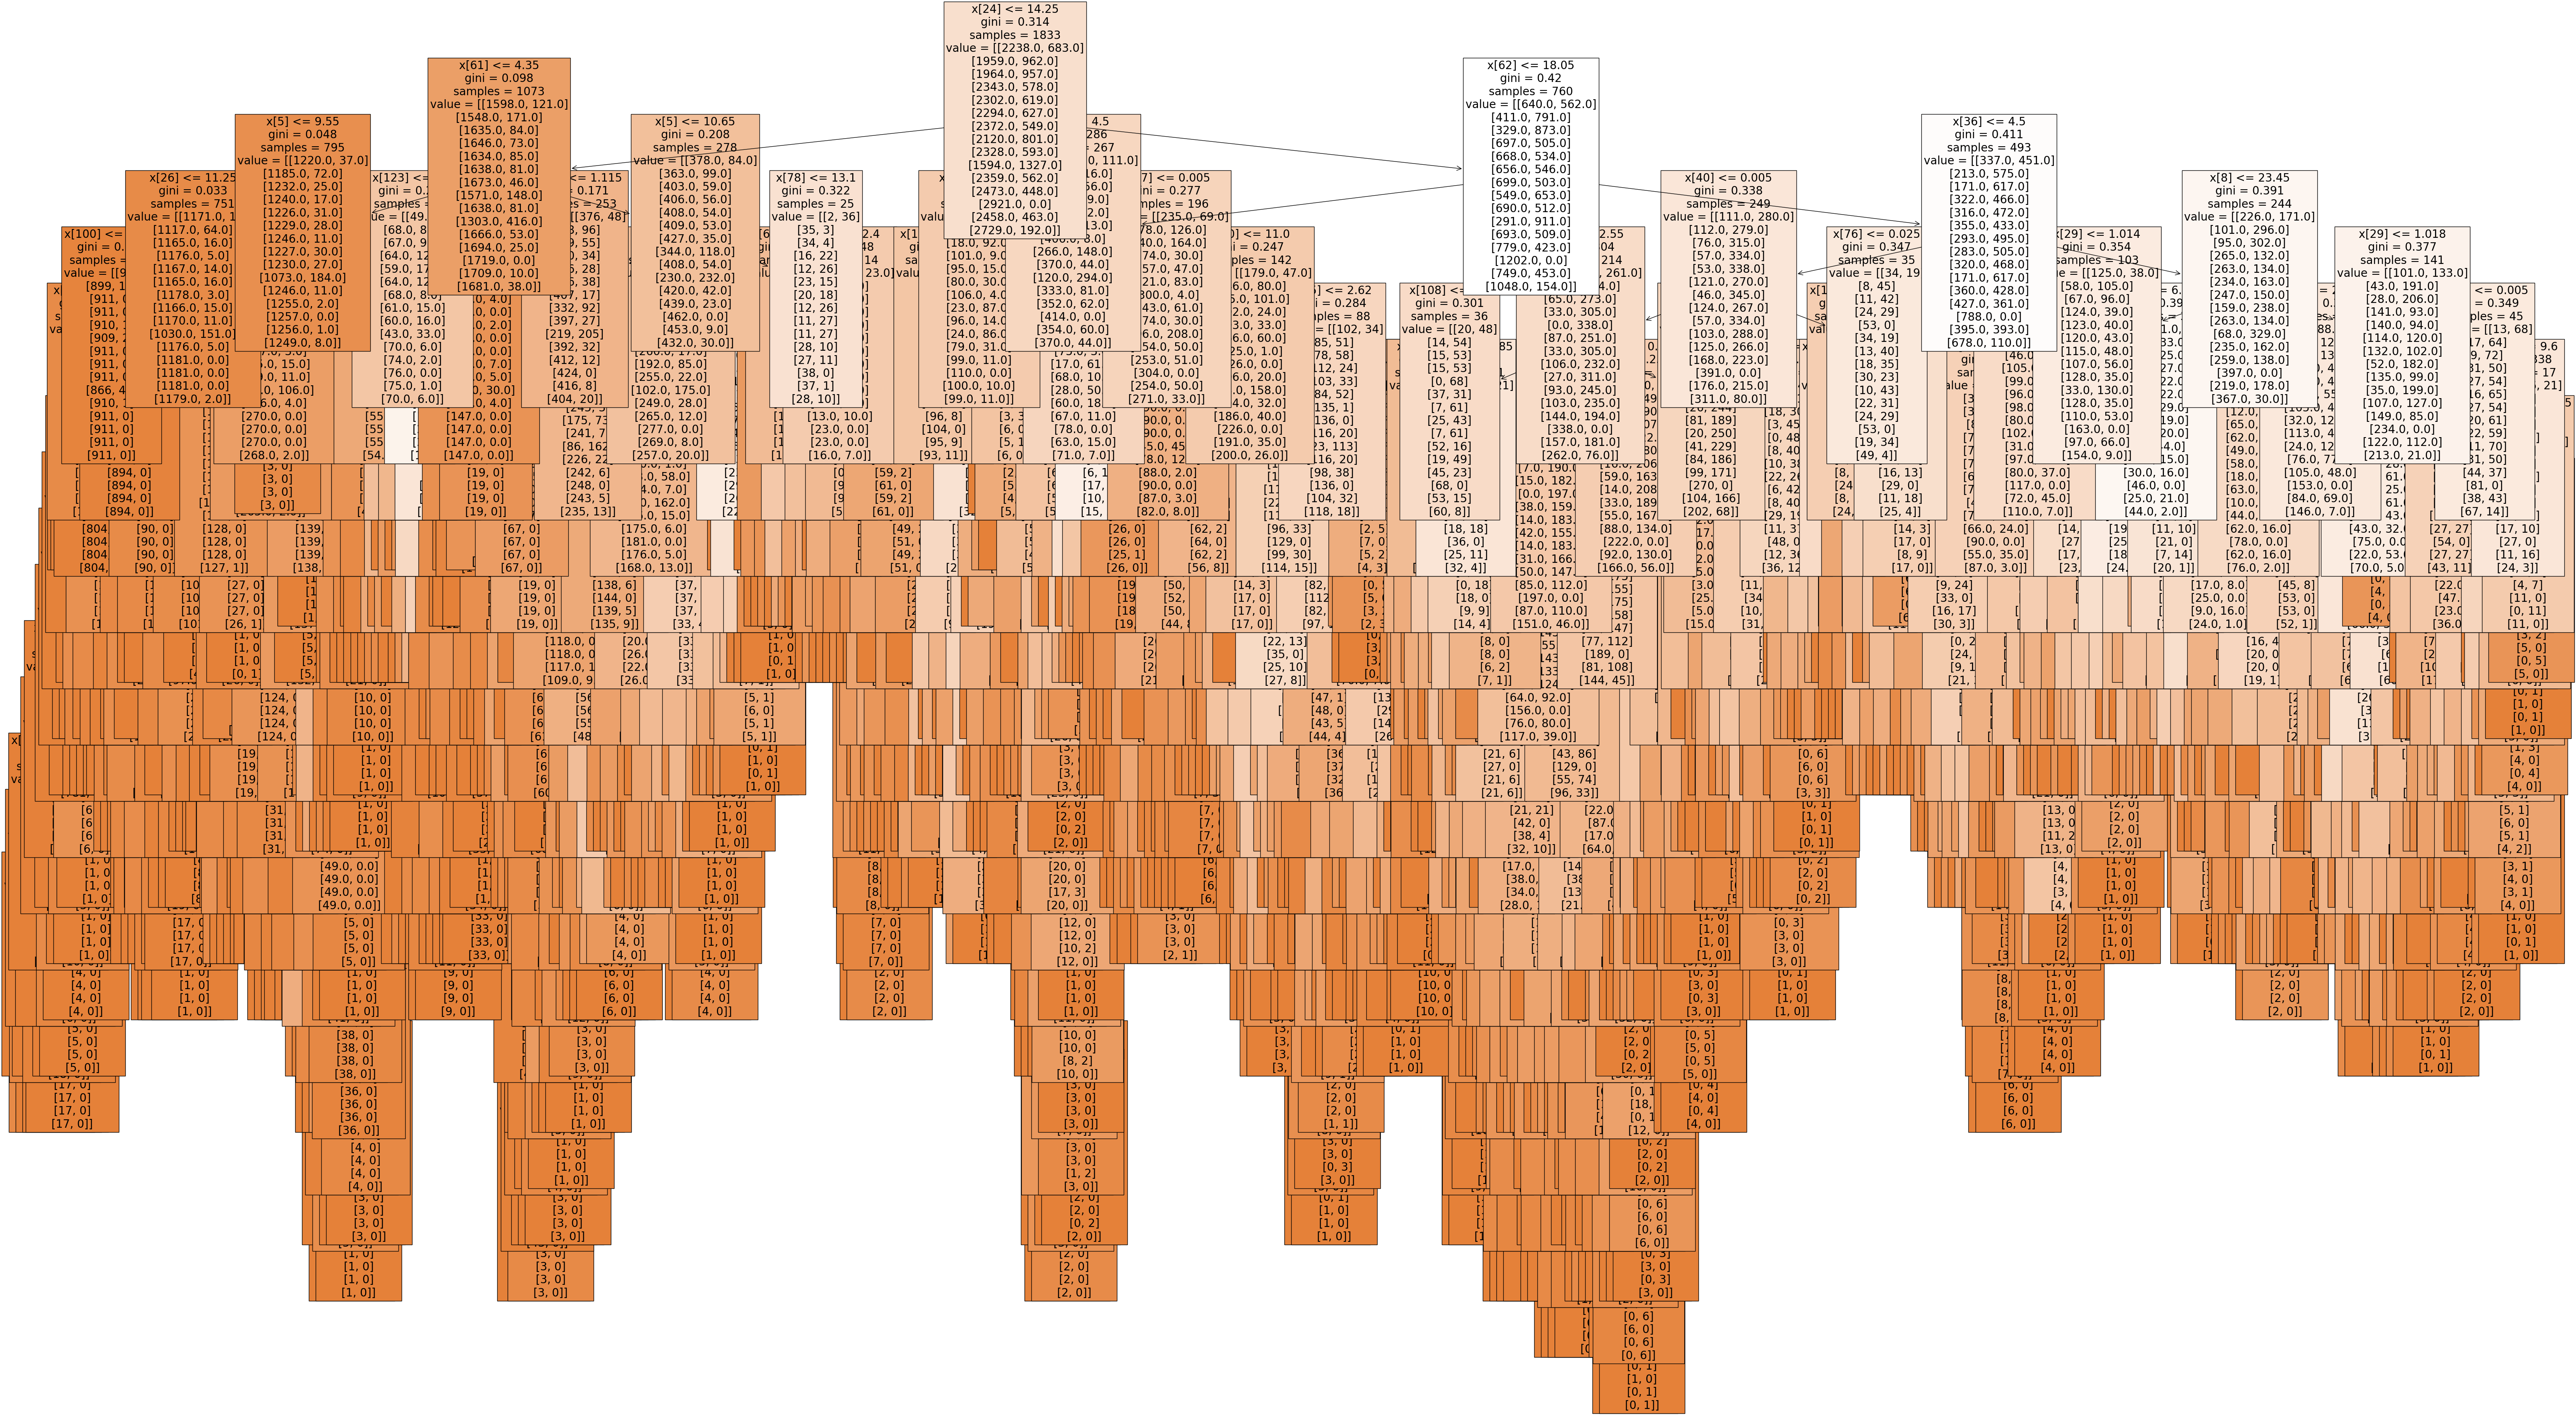

In [90]:
pred = ['Good Weather','Bad Weather']

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15],fontsize=20,class_names=pred,filled=True)

In [94]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
newarray

array([0.00254006, 0.00328479, 0.00313904, 0.00410302, 0.01319569,
       0.0081025 , 0.03149879, 0.00326816, 0.02449085, 0.00357043,
       0.00362138, 0.00349235, 0.00551655, 0.01208601, 0.00473908,
       0.0065817 , 0.00768742, 0.0062714 , 0.00268911, 0.00271054,
       0.00299917, 0.00447598, 0.00945881, 0.00429791, 0.00886857,
       0.00556881, 0.01943759, 0.00420497, 0.00296046, 0.00474507,
       0.00456431, 0.00880392, 0.00523812, 0.00854938, 0.00265025,
       0.02907714, 0.00485156, 0.00418275, 0.00423322, 0.0076777 ,
       0.01323515, 0.00972825, 0.00856219, 0.00356044, 0.03662466,
       0.00191207, 0.0032665 , 0.00561886, 0.00420266, 0.00677915,
       0.00374207, 0.01207288, 0.00283062, 0.0163781 , 0.00354624,
       0.00461873, 0.00375669, 0.00364413, 0.01008786, 0.00547798,
       0.01445415, 0.00592928, 0.03654301, 0.00299497, 0.00361007,
       0.00304319, 0.00428589, 0.01319282, 0.00369209, 0.01143871,
       0.00320725, 0.0195172 , 0.00547213, 0.00669712, 0.00382

In [96]:
np.set_printoptions(threshold=1000)

In [98]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00254006, 0.00328479, 0.00313904, 0.00410302, 0.01319569,
         0.0081025 , 0.03149879, 0.00326816, 0.02449085],
        [0.00357043, 0.00362138, 0.00349235, 0.00551655, 0.01208601,
         0.00473908, 0.0065817 , 0.00768742, 0.0062714 ],
        [0.00268911, 0.00271054, 0.00299917, 0.00447598, 0.00945881,
         0.00429791, 0.00886857, 0.00556881, 0.01943759],
        [0.00420497, 0.00296046, 0.00474507, 0.00456431, 0.00880392,
         0.00523812, 0.00854938, 0.00265025, 0.02907714],
        [0.00485156, 0.00418275, 0.00423322, 0.0076777 , 0.01323515,
         0.00972825, 0.00856219, 0.00356044, 0.03662466],
        [0.00191207, 0.0032665 , 0.00561886, 0.00420266, 0.00677915,
         0.00374207, 0.01207288, 0.00283062, 0.0163781 ],
        [0.00354624, 0.00461873, 0.00375669, 0.00364413, 0.01008786,
         0.00547798, 0.01445415, 0.00592928, 0.03654301],
        [0.00299497, 0.00361007, 0.00304319, 0.00428589, 0.01319282,
         0.00369209, 0.01143871, 0.0032072

In [100]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.09362289, 0.05356632, 0.06050649, 0.07079361, 0.09265592,
       0.05680293, 0.08805808, 0.06498219, 0.10570424, 0.05431646,
       0.07678786, 0.05121045, 0.03646113, 0.06351566, 0.03101578])

In [102]:
stations = [
    'BASEL',
    'BELBRADE',
    'BUDAPEST',
    'DEBILT',
    'DUSSELDORF',
    'HEATHROW',
    'KASSEL',
    'LJUBLJANA',
    'MAASTRICHT',
    'MADRID',
    'MUNCHENB',
    'OSLO',
    'SONNBLICK',
    'STOCKHOLM',
    'VALENTIA'
]

In [104]:
important = pd.Series(sumarray,index=stations)
important

BASEL         0.093623
BELBRADE      0.053566
BUDAPEST      0.060506
DEBILT        0.070794
DUSSELDORF    0.092656
HEATHROW      0.056803
KASSEL        0.088058
LJUBLJANA     0.064982
MAASTRICHT    0.105704
MADRID        0.054316
MUNCHENB      0.076788
OSLO          0.051210
SONNBLICK     0.036461
STOCKHOLM     0.063516
VALENTIA      0.031016
dtype: float64

['BASEL', 'BELBRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


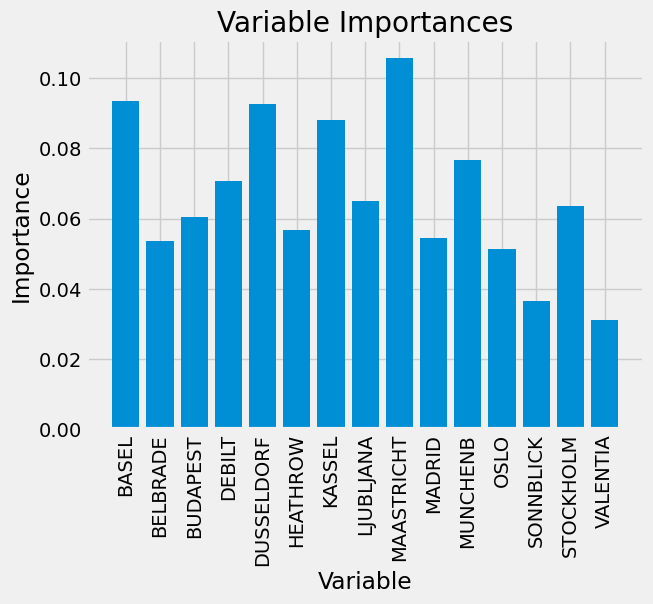

In [106]:
%matplotlib inline

plt.style.use('fivethirtyeight')
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Maastricht

In [109]:
# Creatring MAASTRICHT subset
df_maastricht = df_weather[['MAASTRICHT_cloud_cover','MAASTRICHT_humidity','MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max']]
df_maastricht

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [111]:
df_maastricht_pleasant = df_pleasant[['MAASTRICHT_pleasant_weather']]
df_maastricht_pleasant

MAASTRICHT_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [113]:
# Creating matrix
X = df_maastricht
y = df_maastricht_pleasant

print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [115]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [117]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [129]:
# creating a RF classifier
clf_a = RandomForestClassifier()

#### Grid Search

In [131]:
grid_space = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7,9,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,3],
    'criterion': ['gini', 'entropy']
}

In [167]:
start = time.time()
grid = GridSearchCV(clf_a,param_grid=grid_space_2,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train.values.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV 2/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.6s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.2s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=1.000 total time=   2.3s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.2s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.7s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=9, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.3s
[CV 2/

In [168]:
# Printing grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


#### Random Search

In [169]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [170]:
# creating a RF classifier
clf_b= RandomForestClassifier()

In [171]:
start = time.time()
rf_random = RandomizedSearchCV(clf_b, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train.values.ravel())
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END criterion=entropy, max_depth=5, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.994 total time=   1.4s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.9s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.998 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.8s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=1.000 total time=   2.1s
[CV 1/3] END criterion=ent

In [177]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [181]:
clf_c = RandomForestClassifier(
    n_estimators = 10, 
    max_depth=3, 
    max_features=7, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    criterion = 'gini'
)

clf_c.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=3, max_features=7, n_estimators=10)

In [183]:
# Performing predictions on test dataset
y_pred = clf_c.predict(X_test)

# Calculating accuracy
print('Model Accuracy: ', metrics.accuracy_score(y_test,y_pred)) 

Model Accuracy:  1.0


[Text(0.4, 0.875, 'x[8] <= 17.95\ngini = 0.324\nsamples = 11666\nvalue = [14623, 3737]\nclass = Good Weather'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 7756\nvalue = [12266, 0]\nclass = Good Weather'),
 Text(0.6, 0.625, 'x[4] <= 0.005\ngini = 0.474\nsamples = 3910\nvalue = [2357, 3737]\nclass = Bad Weather'),
 Text(0.4, 0.375, 'x[3] <= 1.185\ngini = 0.05\nsamples = 2457\nvalue = [99, 3737]\nclass = Bad Weather'),
 Text(0.2, 0.125, 'gini = 0.402\nsamples = 188\nvalue = [84, 218]\nclass = Bad Weather'),
 Text(0.6, 0.125, 'gini = 0.008\nsamples = 2269\nvalue = [15, 3519]\nclass = Bad Weather'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1453\nvalue = [2258, 0]\nclass = Good Weather')]

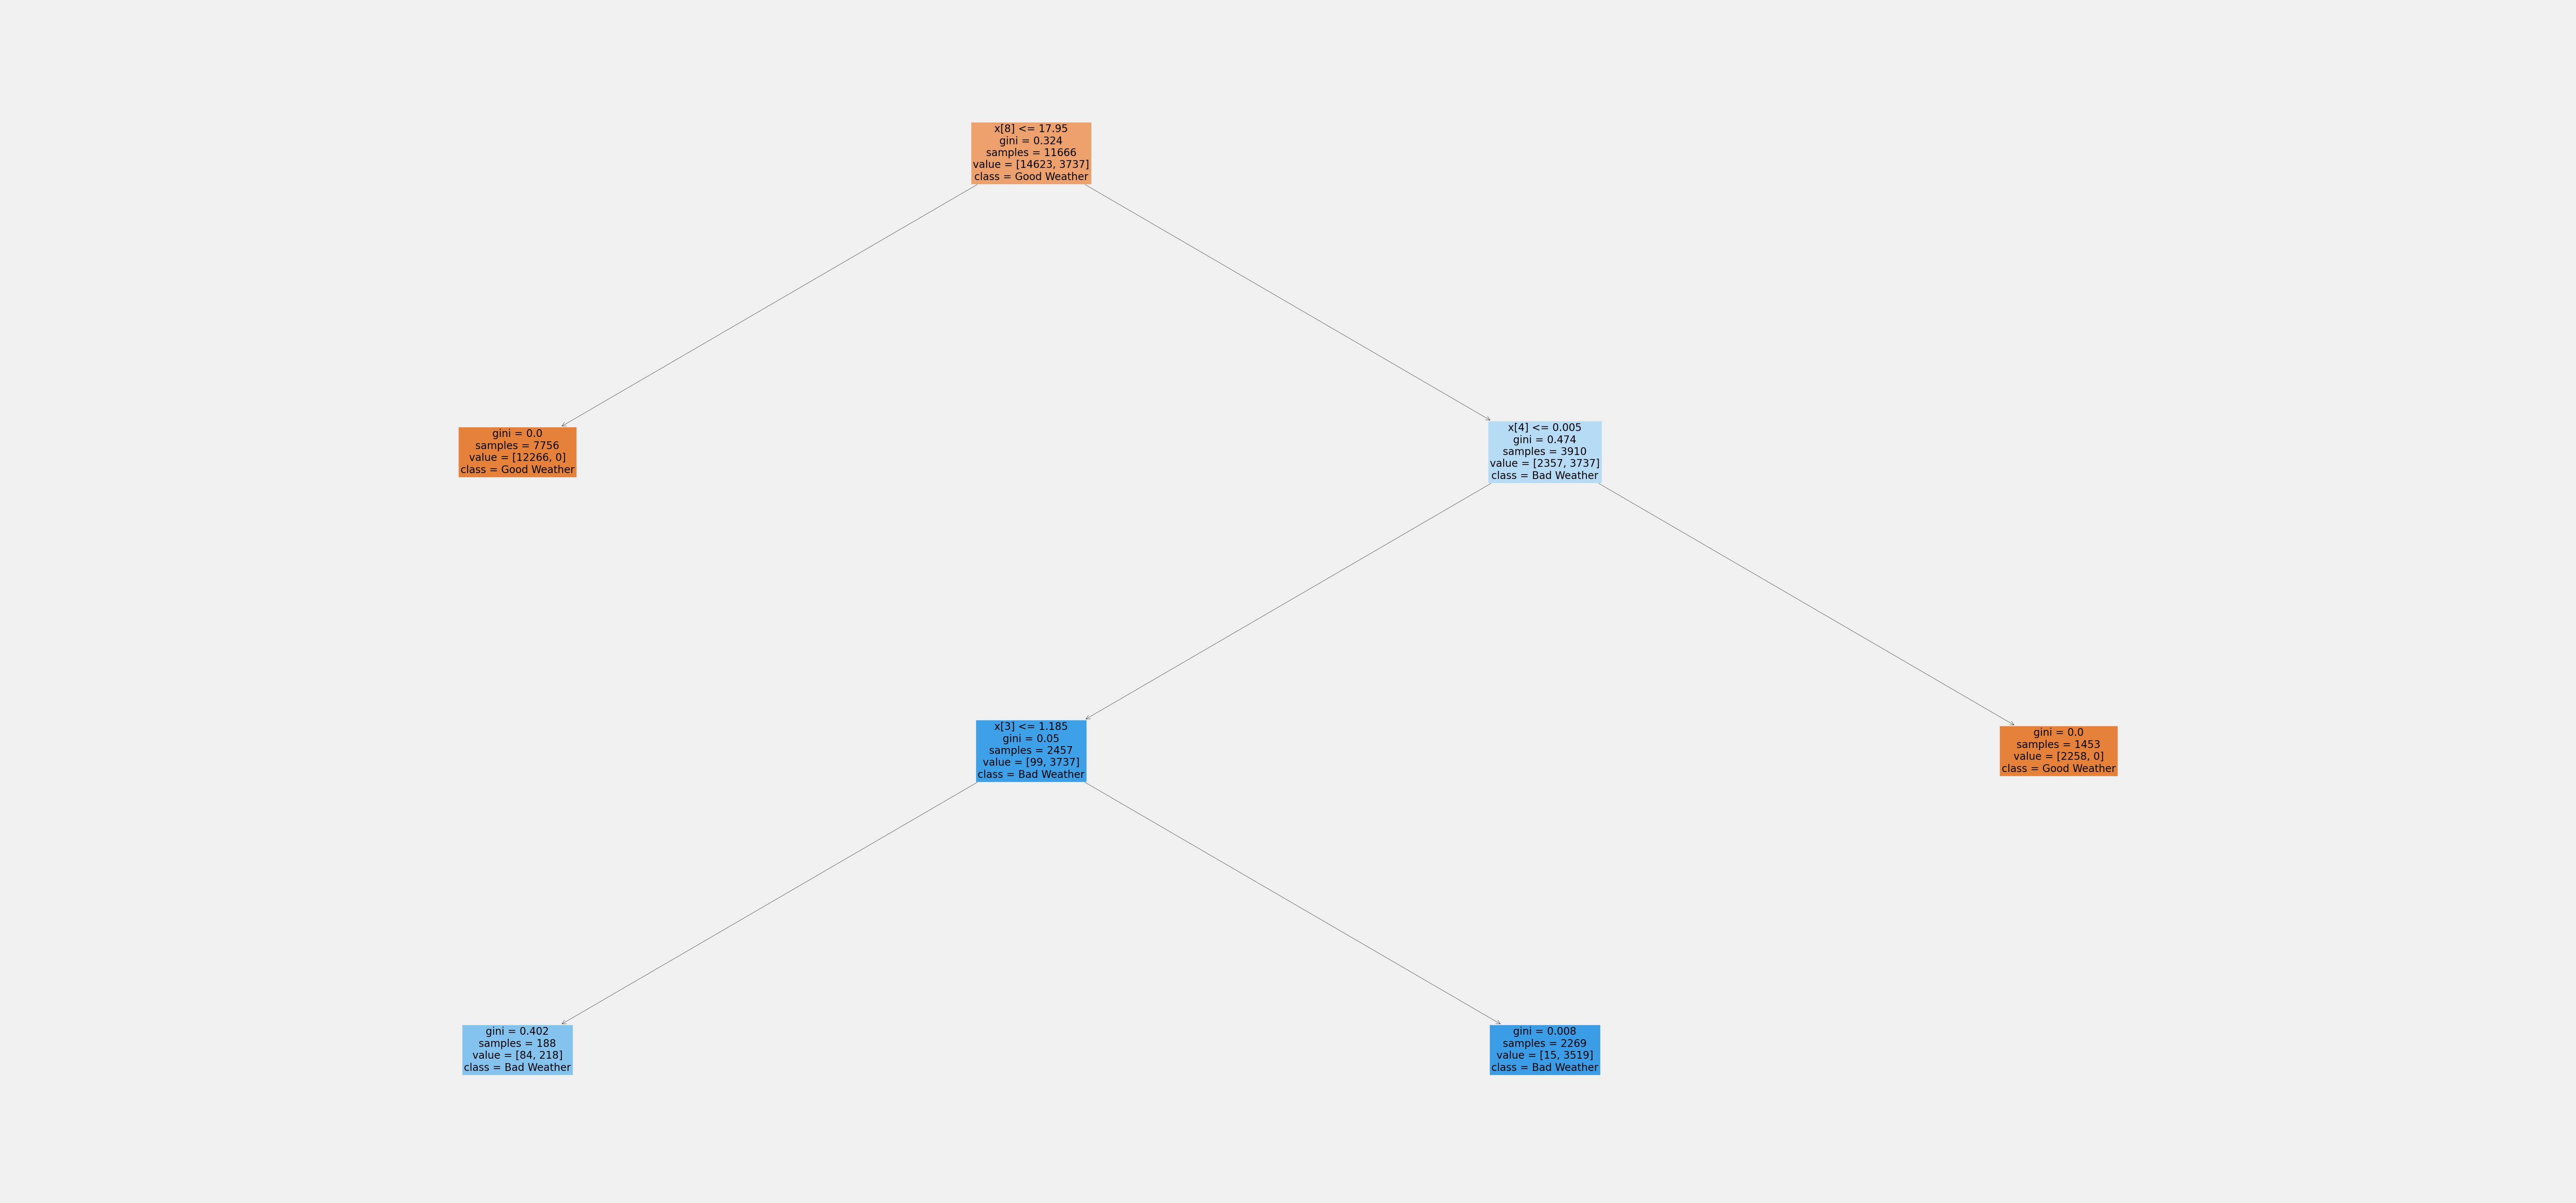

In [193]:
pred = ['Good Weather','Bad Weather']

fig = plt.figure(figsize=(80,40))
plot_tree(clf_c.estimators_[9],fontsize=20,class_names=pred,filled=True)

In [195]:
np.set_printoptions(threshold=np.inf)
newarray = clf_c.feature_importances_
newarray

array([0.03453245, 0.00426454, 0.        , 0.00144134, 0.41586714,
       0.01804195, 0.07736674, 0.        , 0.44848584])

In [197]:
np.set_printoptions(threshold=1000)

In [199]:
variables = [
    'cloud_cover',
    'humidity',
    'pressure',
    'global_ratiation',
    'precipitation',
    'sunshine',
    'temp_mean',
    'temp_min',
    'temp_max'
]

In [201]:
important = pd.Series(newarray, index = variables) #.sort_values(ascending = False)
important

cloud_cover         0.034532
humidity            0.004265
pressure            0.000000
global_ratiation    0.001441
precipitation       0.415867
sunshine            0.018042
temp_mean           0.077367
temp_min            0.000000
temp_max            0.448486
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_ratiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


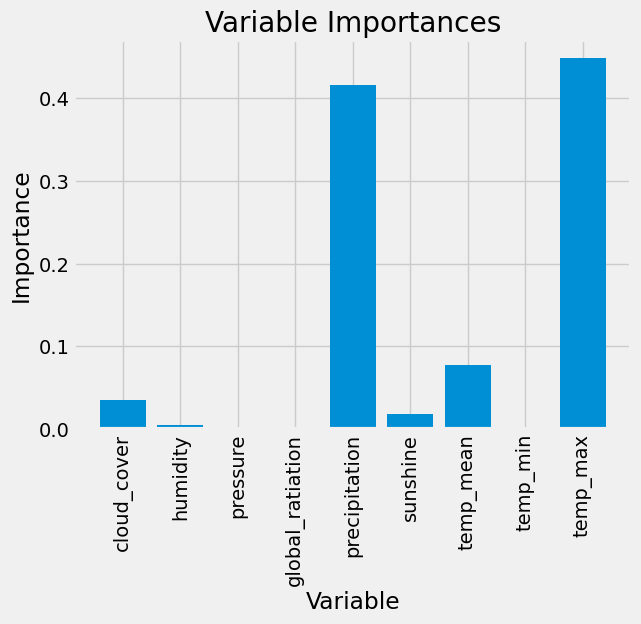

In [203]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, variables, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');